In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [88]:
train=pd.read_csv("/kaggle/input/mse-2-ai-201-b-ai-a/train.csv")
test=pd.read_csv("/kaggle/input/mse-2-ai-201-b-ai-a/test.csv")

In [110]:
train.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,79879.0,1267.274,483.3133,194.6325,0.9153,304.2065,0.9681,75075.0,0.7105,2.4832,0.6052,0.6294,0.0066,0.0027,0.3962,0.98380,0
1,100409.0,1219.521,448.4252,275.7984,0.8077,357.5538,0.9920,101215.0,0.7639,1.6961,0.8484,0.7644,0.0056,0.0027,0.5842,0.99090,1
2,80569.0,1267.274,498.0320,212.6353,0.9043,320.2868,0.9534,84508.0,0.6326,2.3422,0.5832,0.6431,0.0062,0.0026,0.4136,0.96870,0
3,58386.0,1088.683,423.7374,187.3131,0.8970,272.6525,0.9061,64440.0,0.6668,2.2622,0.6190,0.6434,0.0073,0.0032,0.4140,0.93660,0
4,84056.0,1267.274,464.7390,237.5981,0.8594,327.1443,0.9427,89167.0,0.7534,1.9560,0.5506,0.7039,0.0055,0.0028,0.4955,0.97275,0


In [90]:
test.head()

,id,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
0,1,57739,1851.574,438.8182,261.1837,0.8036,271.1376,0.7170,80524,0.5507,1.6801,0.2116,0.6179,0.0076,0.0045,0.3818,0.6414
1,2,83522,2062.064,453.1792,335.8377,0.6714,326.1035,0.7482,111637,0.6197,1.3494,0.2468,0.7196,0.0054,0.0040,0.5178,0.6987
2,3,56531,1982.064,422.6460,231.4328,0.8368,268.2862,0.7620,74183,0.5634,1.8262,0.1808,0.6348,0.0075,0.0041,0.4029,0.7359
3,4,80415,1933.293,472.1519,241.1400,0.8597,319.9806,0.8720,92215,0.6852,1.9580,0.2704,0.6777,0.0059,0.0030,0.4593,0.8993
4,5,72137,1239.403,428.7899,223.9258,0.8528,303.0638,0.9222,78219,0.7338,1.9149,0.5901,0.7068,0.0059,0.0031,0.4996,0.9566


In [91]:
for df in [train,test]:
    nums_col=df.select_dtypes(include=['int64','float64']).columns
    cats_col=df.select_dtypes(include=['object']).columns

    df[nums_col]=df[nums_col].fillna(df[nums_col].median())

    for col in cats_col:
        df[col]=df[col].fillna(df[col].mode()[0])

In [92]:
label_map={}

for col in train.columns:
    if train[col].dtype=='object':
        le=LabelEncoder()
        train[col]=le.fit_transform(train[col].astype(str))
        label_map[col]=le

for col in test.columns:
    if test[col].dtype=='object':
        le=label_map[col]
        test[col]=le.transfrom(test[col].astype(str))

In [93]:
X=train.drop(['Class'],axis=1)
y=train['Class']

In [94]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [95]:
rf=RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

In [96]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [97]:
y_preds=rf.predict(X_val)

In [98]:
target_le=label_map["Class"]
y_val_decoded=target_le.inverse_transform(y_val)
y_preds_decoded=target_le.inverse_transform(y_preds)

In [99]:
print("Accuracy : ", accuracy_score(y_val,y_preds))
print("\nConfusion Matrix : \n",confusion_matrix(y_val,y_preds))
print("\nClassification Report : \n", classification_report(y_val_decoded,y_preds_decoded))

Accuracy :  0.8794520547945206

Confusion Matrix : 
 [[191  24]
 [ 20 130]]

Classification Report : 
                    precision    recall  f1-score   support

Kirmizi_Pistachio       0.91      0.89      0.90       215
   Siit_Pistachio       0.84      0.87      0.86       150

         accuracy                           0.88       365
        macro avg       0.87      0.88      0.88       365
     weighted avg       0.88      0.88      0.88       365



In [100]:
X_test=test.drop(["id"],axis=1)
test_preds_num=rf.predict(X_test)
target_le=label_map["Class"]
test_preds=target_le.inverse_transform(test_preds_num)

In [101]:
submission=pd.DataFrame({
    "id": test["id"],
    "Class" : test_preds
})

In [102]:
submission.to_csv("alokfinalsubmission.csv",index=False)
print("Sucessfully save file !")

Sucessfully save file !


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x1000 with 0 Axes>

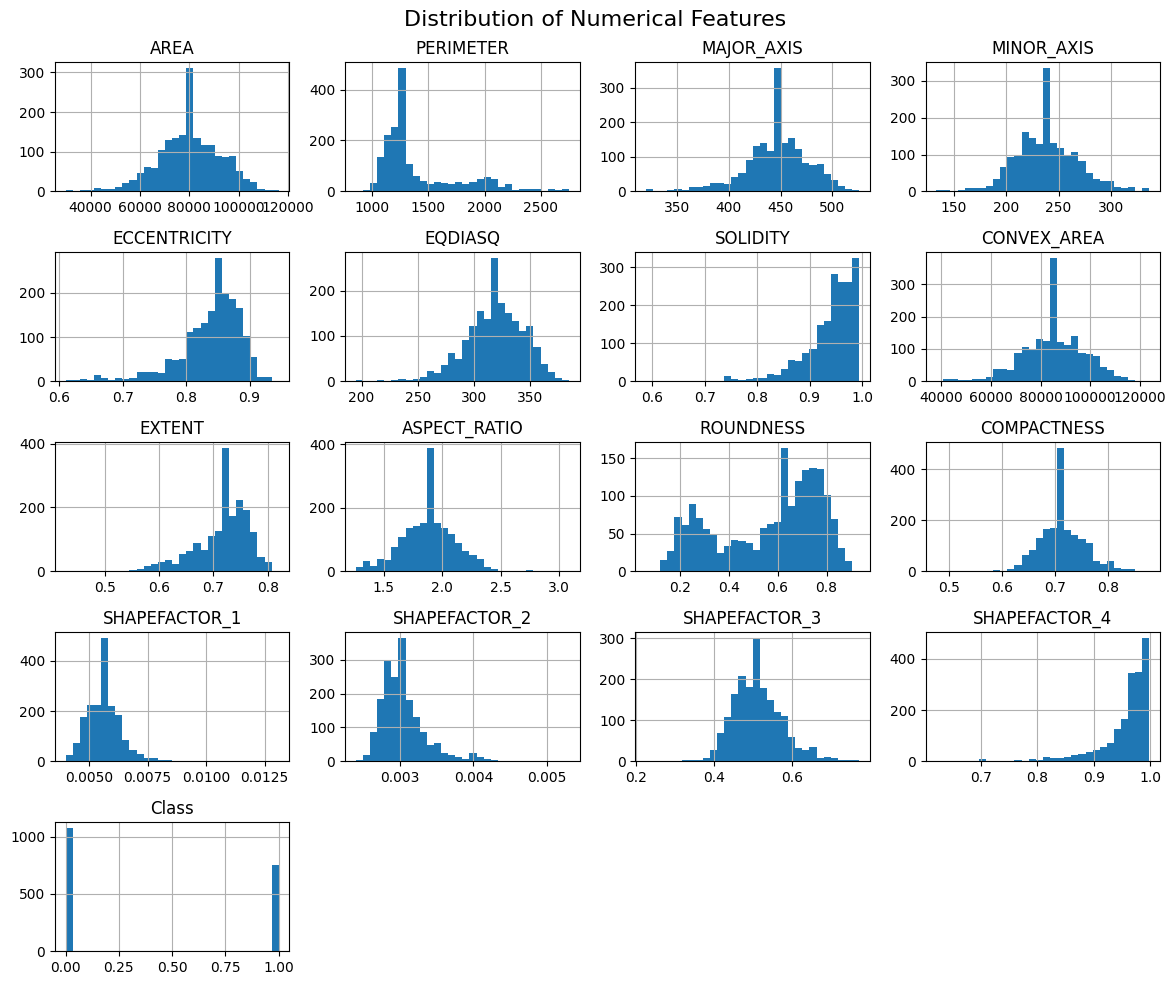

In [103]:
numeric_cols=train.select_dtypes(include=['int64','float64']).columns



plt.figure(figsize=(12,10))
train[numeric_cols].hist(figsize=(12,10),bins=30)
plt.suptitle("Distribution of Numerical Features",fontsize=16)
plt.tight_layout()
plt.show

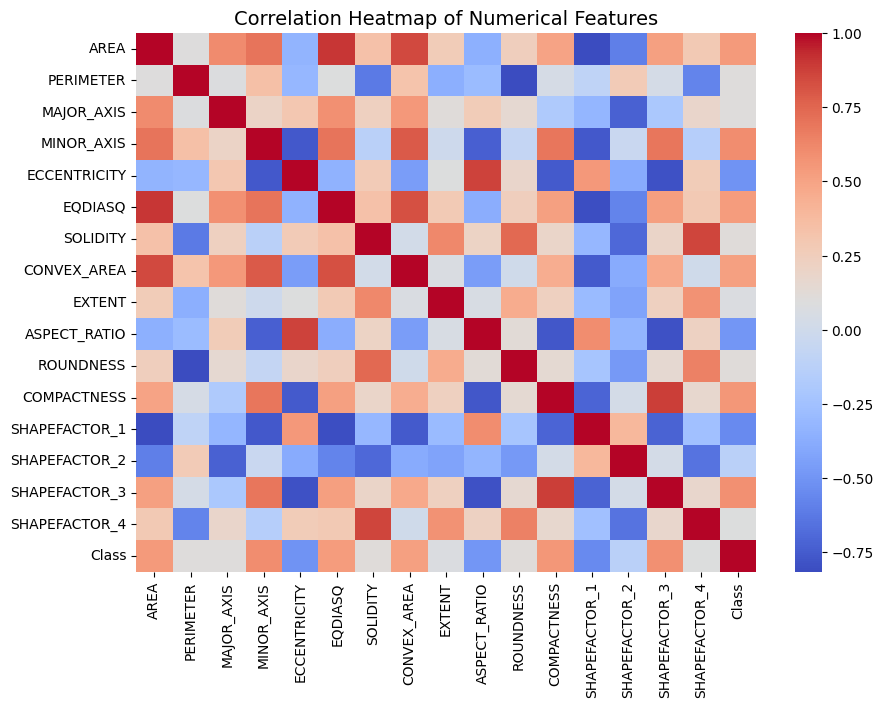

In [104]:
plt.figure(figsize=(10,7))
corr=train[numeric_cols].corr()
sns.heatmap(corr,annot=False,cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

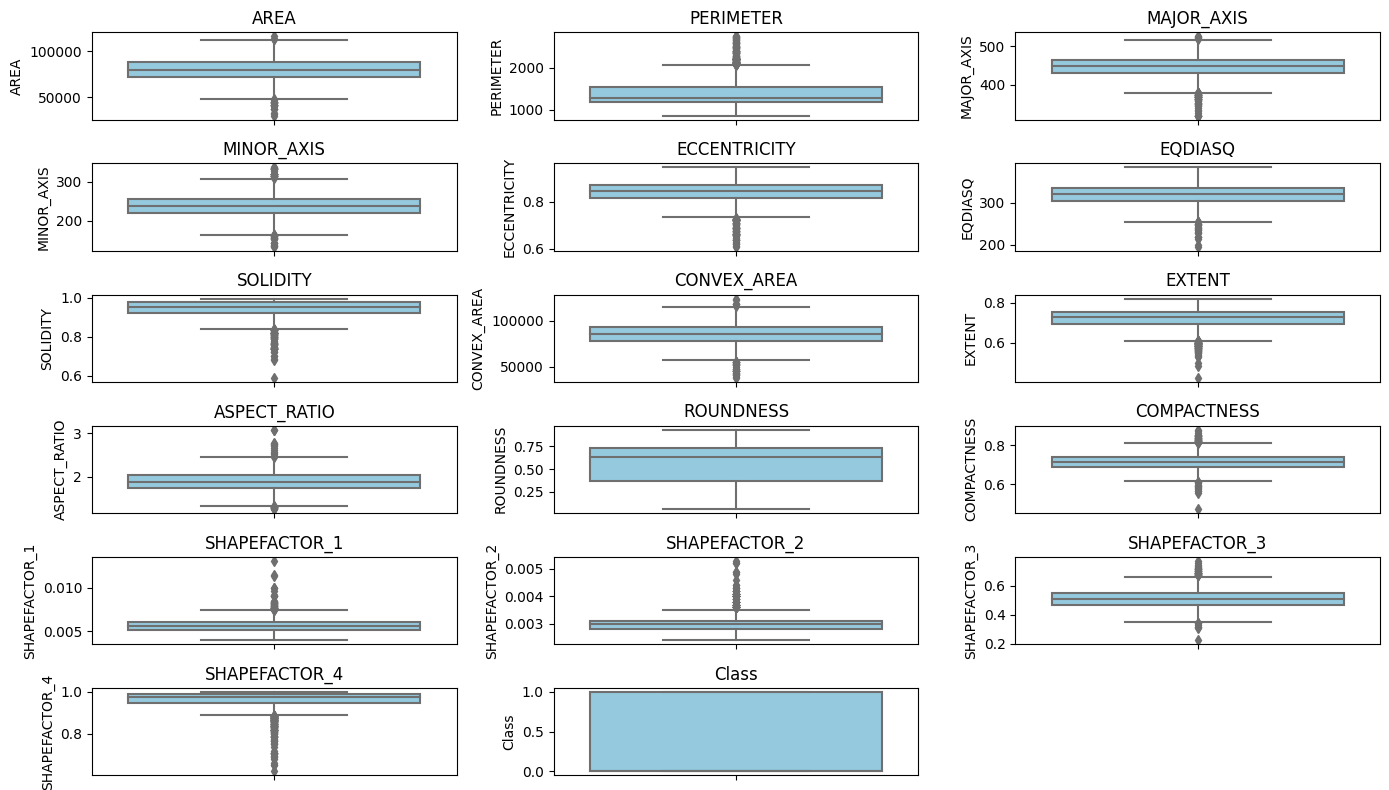

In [105]:
plt.figure(figsize=(14,8))
for i,col in enumerate(numeric_cols,1):
    plt.subplot((len(numeric_cols)//3)+1,3,i)
    sns.boxplot(y=train[col],color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [108]:
alok=pd.read_csv("alokfinalsubmission.csv")

In [109]:
alok

,id,Class
0,1,Kirmizi_Pistachio
1,2,Siit_Pistachio
2,3,Kirmizi_Pistachio
3,4,Kirmizi_Pistachio
4,5,Kirmizi_Pistachio
...,...,...
640,641,Kirmizi_Pistachio
641,642,Siit_Pistachio
642,643,Kirmizi_Pistachio
643,644,Kirmizi_Pistachio
